In [1]:
from favorites import *
from jupyter_utils import *
from utilities import *

Using LaTeX for formatting text!


In [2]:
# Directory for code examples
parent_dir = os.path.abspath('..')

# https://github.com/rust-lang/mdBook/issues/708
gfx_dir = os.path.join(parent_dir, *['src', 'gfx'])
print(gfx_dir)

code_dir = os.path.join(parent_dir, "gists")
print(code_dir)

/Users/bogeholm/Dropbox/Code-Dropbox/datascience-notes/src/gfx
/Users/bogeholm/Dropbox/Code-Dropbox/datascience-notes/gists


In [3]:
tf.__version__

'2.2.0'

In [4]:
torch.__version__

'1.5.0'

### Utilities
[mplot3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots)

In [5]:
def xymesh(minmax, npoints=100):
    """ Create x,y-mesh for plotting
    """
    x = np.linspace(-minmax, minmax, npoints)
    y = np.linspace(-minmax, minmax, npoints)
    return np.meshgrid(x, y)

## Hard functions for optimizers
[Wikipedia: Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)

### Himmelblau
[Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

In [6]:
def himmelblau(X, Y):
    """ https://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (X**2 + Y -11)**2 + (X + Y**2 - 7)**2

def himmelblau_square_loss(X, Y):
    return (himmelblau(X, Y))**2

himmelblau_minima = [
    (3.0, 2.0),
    (-2.805118, 3.131312),
    (-3.779310, -3.283186),
    (3.584428, -1.848126)
]

for m in himmelblau_minima:
    print(f"f{m[0], m[1]} = {himmelblau(*m)}")

f(3.0, 2.0) = 0.0
f(-2.805118, 3.131312) = 1.0989296656869089e-11
f(-3.77931, -3.283186) = 3.797861082863832e-12
f(3.584428, -1.848126) = 8.894376497582423e-12


In [7]:
Xhimmel, Yhimmel = xymesh(6)
Zhimmel = himmelblau(Xhimmel, Yhimmel)

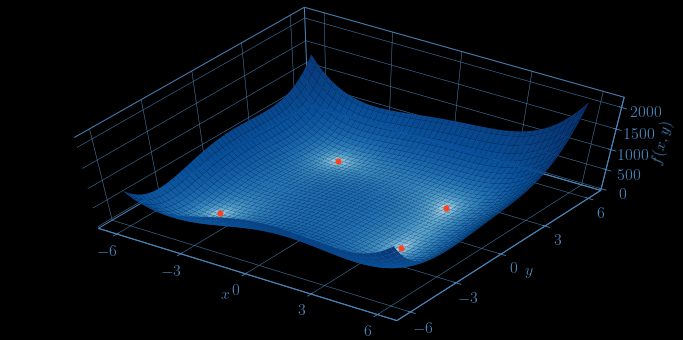

In [8]:
figsize(12, 6)
fig, ax = plot3d(Xhimmel, Yhimmel, Zhimmel, normalizer='log')
ax.elev = 60
ax.azim = 305

for (x_min, y_min) in himmelblau_minima:
    ax.plot([x_min], [y_min], [himmelblau(x_min, y_min)], markersize=10, zorder=10, marker= '.', color='xkcd:orange red', linestyle='None')

### Rosenbrock
[Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)

In [9]:
def rosenbrock(X, Y, a=1, b=100):
    """ https://en.wikipedia.org/wiki/Rosenbrock_function
    """
    return (a - X)**2 + b*(Y - X**2)**2

def rosenbrock_square_loss(X, Y, a=1, b=100):
    return (rosenbrock(X, Y, a=a, b=b))**2

def rosenbrock_minimum(a=1, b=100):
    """ Analytical minimum
    """
    return (a, a*a)

In [10]:
Xrosen, Yrosen = xymesh(3)
Zrosen = rosenbrock(Xrosen, Yrosen)

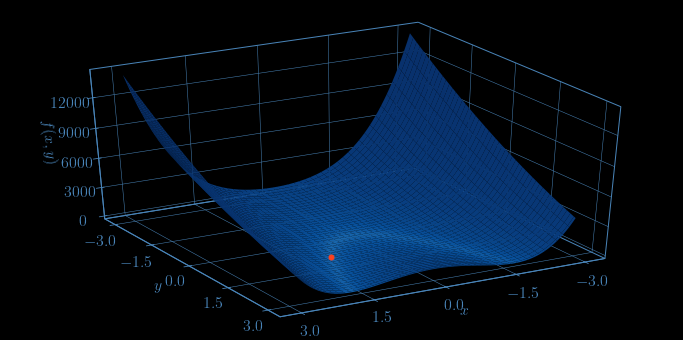

In [11]:
figsize(12, 6)
fig, ax = plot3d(Xrosen, Yrosen, Zrosen, normalizer='log')
ax.elev = 35
ax.azim = 60

(x_min, y_min) = rosenbrock_minimum()
ax.plot([x_min], [y_min], [rosenbrock(x_min, y_min)], markersize=10, zorder=10, marker= '.', color='xkcd:orange red', linestyle='None')


### Compare optimizer facilities between PyTorch and Tensorflow

In [12]:
torch_optimizers = dir(torch.optim)
tf_optimizers = dir(tf.keras.optimizers)

common_optimizers = [x for x in torch_optimizers if x in tf_optimizers]
common_optimizers = [x for x in common_optimizers if "__" not in x]

print(common_optimizers)

['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Optimizer', 'RMSprop', 'SGD']


In [13]:
# 'Optimizer' is the base class
common_optimizers = [x for x in common_optimizers if x != "Optimizer"]

print(common_optimizers)

['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'RMSprop', 'SGD']


## Pytorch
- [torch.optim](https://pytorch.org/docs/stable/optim.html)
- [bogeholm/machine-learning-adventures/Optimization.ipynb](https://github.com/bogeholm/machine-learning-adventures/blob/master/Optimization.ipynb)
- Subchapter 'Optimizers á la carte' in Deep Learning with PyTorch, pp. 257

### Minimal working example

In [14]:
%%write_and_run $code_dir 'pytorch-optimization-mwe.py'
# Minimum
(torch_xmin, torch_ymin) = (2.0, 3.0)

# Starting point for optimization
(torch_x0, torch_y0) = (8.0, 7.0)

# Initialize
torch_params = torch.tensor([torch_x0, torch_y0], requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([torch_params], lr=0.2)

# Loss function
def torch_loss(x, y):
    return (x - torch_xmin)**2 + (y - torch_ymin)**2

# Optimize
for idx in range(50):
    optimizer.zero_grad()
    loss = torch_loss(*torch_params)
    loss.backward()
    optimizer.step()

res = torch_params.detach().numpy()

print("x: {:.5f}".format(res[0]))
print("y: {:.5f}".format(res[1]))

x: 2.00000
y: 3.00000


In [15]:
#dir(torch.optim)

In [16]:
# Rosenbrock
torch_params = torch.tensor([-2.5, -2.5], requires_grad=True)

# Chapter 'Optimizers a la carte'
optimizer = torch.optim.SGD([torch_params], lr=1e-8)
#loss_fn = rosenbrock_sloss(*rosen_p0)

In [17]:
# Useful checks
#loss.backward()
#optimizer.step()
#rosen_p0

In [18]:
nsteps = 2500
opt_params = torch.zeros(nsteps, 2)

for idx in range(nsteps):
    opt_params[idx, :] = torch_params
    optimizer.zero_grad()
    loss = rosenbrock_square_loss(*torch_params)
    loss.backward()
    optimizer.step()
    
    #if idx % 100 == 0:
    #    print(f"idx: {idx}, loss: {loss}")

rosen_opt = opt_params.detach().numpy()

In [19]:
rosen_opt[0:5, :]

array([[-2.5      , -2.5      ],
       [-1.1569389, -2.2316024],
       [-1.1145589, -2.2133346],
       [-1.0775278, -2.1967676],
       [-1.0446728, -2.1815658]], dtype=float32)

### Let's see how we did!

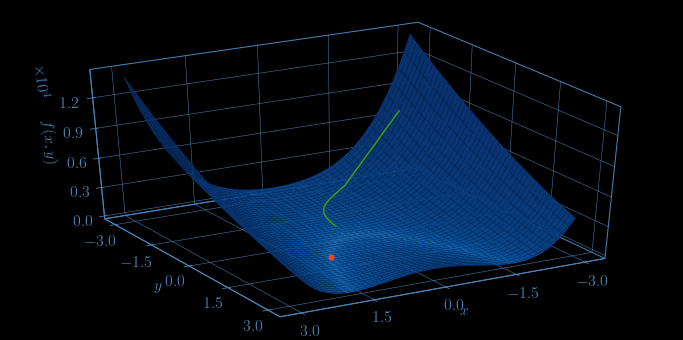

In [20]:
figsize(12, 6)
fig, ax = plot3d(Xrosen, Yrosen, Zrosen, normalizer='log')
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
ax.elev = 35
ax.azim = 60

(x_min, y_min) = rosenbrock_minimum()
ax.plot([x_min], [y_min], [rosenbrock(x_min, y_min)], markersize=10, zorder=10, marker= '.', color='xkcd:orange red', linestyle='None')

ax.plot(rosen_opt[:, 0], rosen_opt[:, 1], rosenbrock(rosen_opt[:, 0], rosen_opt[:, 1]), zorder=50)

### Wrapper function for PyTorch optimization

In [21]:
def optimize_torch(optimizer_class, lossfunc, p0, nsteps, **opt_kwargs):
    """ Optimize a python function with Torch using only its 
        loss function
    """
    torch_params = torch.tensor(p0, requires_grad=True)
    
    opt_step = torch.zeros(nsteps, len(p0))
    loss_step = torch.zeros(nsteps)
    
    optimizer = optimizer_class([torch_params], **opt_kwargs)
    
    for idx in range(nsteps):
        optimizer.zero_grad()
        loss = lossfunc(*torch_params)
        # Store parameter and loss
        opt_step[idx, :] = torch_params
        loss_step[idx] = loss
        # Compute the gradient
        loss.backward()
        optimizer.step()
    
    return opt_step.detach().numpy(), loss_step.detach().numpy()

In [22]:
p0_rosen = [2.5, -2.5]
nsteps = 2500
# ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'RMSprop', 'SGD']

torch_rosen = OrderedDict()
torch_rosen_loss = OrderedDict()

In [42]:
%time
torch_rosen['SGD'], torch_rosen_loss['SGD'] = optimize_torch(torch.optim.SGD, rosenbrock_square_loss, p0_rosen, nsteps, lr=1e-8)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [43]:
%time
torch_rosen['RMSProp'], torch_rosen_loss['RMSProp'] = optimize_torch(torch.optim.RMSprop, rosenbrock_square_loss, p0_rosen, nsteps)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [44]:
%time
torch_rosen['Adamax'], torch_rosen_loss['Adamax'] = optimize_torch(torch.optim.Adamax, rosenbrock_square_loss, p0_rosen, nsteps)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [46]:
%time
torch_rosen['Adadelta'], torch_rosen_loss['Adadelta'] = optimize_torch(torch.optim.Adadelta, rosenbrock_square_loss, p0_rosen, nsteps)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [47]:
%time
torch_rosen['Adagrad'], torch_rosen_loss['Adagrad'] = optimize_torch(torch.optim.Adagrad, rosenbrock_square_loss, p0_rosen, nsteps)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [28]:
def plot3(ax, xy, plotfunc, **plot_kwargs):
    ax.plot(xy[:, 0], xy[:, 1], plotfunc(xy[:, 0], xy[:, 1]), **plot_kwargs)

In [29]:
def plot3Dscatter(x, y, z):
    """ Scatter points using `ax.plot` instead of `ax.scatter`to hack 
        around current (24/6-2020) mpl_toolkits.mplot3d.Axes3D limitations
        in regards to combining scatter and surface plots
    """

Saved /Users/bogeholm/Dropbox/Code-Dropbox/datascience-notes/src/gfx/rosenbrock-pytorch.svg


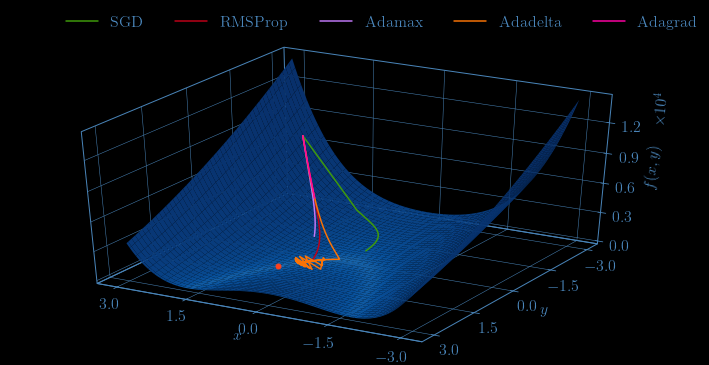

In [30]:
figsize(12, 6)
fig, ax = plot3d(Xrosen, Yrosen, Zrosen, normalizer='log')
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
    
for key, val in torch_rosen.items():
    plot3(ax, val, rosenbrock, zorder=3, label=key)

ax.elev = 35
ax.azim = 120

# Plot the minimum
# Scatterplot like this will not work with current Matplotlib
#ax.scatter(x_min, y_min, rosenbrock(x_min, y_min), marker='o', c='r', s=50)
# See these issues:
# https://stackoverflow.com/questions/51241367/matplotlib-surface-plot-hides-scatter-points-which-should-be-in-front
# https://stackoverflow.com/questions/24123659/scatter-plot-3d-with-labels-and-spheres

(x_min, y_min) = rosenbrock_minimum()
ax.plot([x_min], [y_min], [rosenbrock(x_min, y_min)], markersize=10, zorder=10, marker= '.', color='xkcd:orange red', linestyle='None')

#ax.legend()
#ax.get_legend().set_bbox_to_anchor((0.55, 0.9))
ax.legend(ncol=5)
ax.get_legend().set_bbox_to_anchor((1.05, 1.1))


figsaver(gfx_dir, 'rosenbrock-pytorch.svg', fig, ax)

### Loss

In [31]:
#fig = plt.figure()
#ax = fig.add_subplot(111)

#xax = np.arange(nsteps)

#for key, val in torch_rosen_loss.items():
#    ax.plot(xax, val, label=key)
    
#ax.set_xlabel('Optimization step')
#ax.set_ylabel('Loss')

#ax.legend()

## Himmelblau - PyTorch

In [32]:
p0_himmel = [-6.0, 0.5]
nsteps = 2500
# ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'RMSprop', 'SGD']
# TODO: Convert to map

torch_himmel = OrderedDict()
torch_himmel_loss = OrderedDict()

In [33]:
%time torch_himmel['SGD'], torch_himmel_loss['SGD'] = optimize_torch(torch.optim.SGD, himmelblau_square_loss, p0_himmel, nsteps, lr=1e-6)

CPU times: user 895 ms, sys: 64.5 ms, total: 959 ms
Wall time: 982 ms


In [34]:
%time torch_himmel['RMSProp'], torch_himmel_loss['RMSprop'] = optimize_torch(torch.optim.RMSprop, himmelblau_square_loss, p0_himmel, nsteps)

CPU times: user 938 ms, sys: 61.1 ms, total: 999 ms
Wall time: 1.01 s


In [35]:
%time torch_himmel['Adamax'], torch_himmel_loss['Adamax'] = optimize_torch(torch.optim.Adamax, himmelblau_square_loss, p0_himmel, nsteps)

CPU times: user 1.12 s, sys: 70.3 ms, total: 1.19 s
Wall time: 1.24 s


In [36]:
%time torch_himmel['Adadelta'], torch_himmel_loss['Adadelta'] = optimize_torch(torch.optim.Adadelta, himmelblau_square_loss, p0_himmel, nsteps)

CPU times: user 1.46 s, sys: 86.8 ms, total: 1.55 s
Wall time: 2.59 s


In [37]:
%time torch_himmel['Adagrad'], torch_himmel_loss['Adagrad'] = optimize_torch(torch.optim.Adagrad, himmelblau_square_loss, p0_himmel, nsteps)

CPU times: user 1.04 s, sys: 71.5 ms, total: 1.11 s
Wall time: 1.29 s


Saved /Users/bogeholm/Dropbox/Code-Dropbox/datascience-notes/src/gfx/himmelblau-pytorch.svg


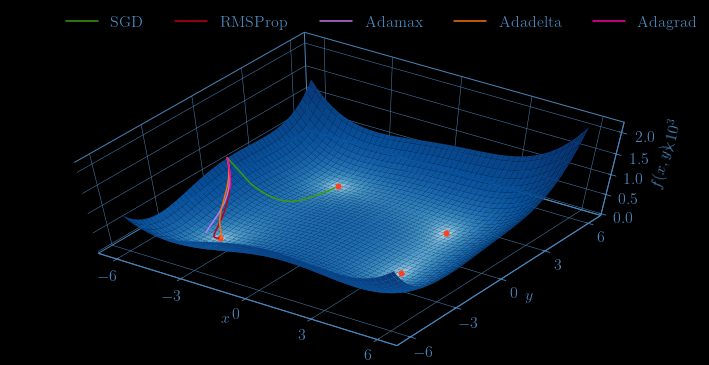

In [38]:
fig, ax = plot3d(Xhimmel, Yhimmel, Zhimmel, normalizer='log')
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

ax.elev = 60
ax.azim = 305

for (x_min, y_min) in himmelblau_minima:
    ax.plot([x_min], [y_min], [himmelblau(x_min, y_min)], markersize=10, zorder=10, marker= '.', color='xkcd:orange red', linestyle='None')


for key, val in torch_himmel.items():
    plot3(ax, val, himmelblau, zorder=10, label=key)
    
#ax.legend()
#ax.get_legend().set_bbox_to_anchor((0.3, 0.9))
#ax.legend(ncol=3)
#ax.get_legend().set_bbox_to_anchor((0.8, 1.2))
ax.legend(ncol=5)
ax.get_legend().set_bbox_to_anchor((1.05, 1.1))

figsaver(gfx_dir, 'himmelblau-pytorch.svg', fig, ax)

## Tensorflow
[tf.keras.optimizers.Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer)

### Minimal working example

In [39]:
%%write_and_run $code_dir 'tensorflow-optimization-mwe.py'
# Optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# Minimum
(tf_xmin, tf_ymin) = (2.0, 3.0)

# Starting point for optimization
(tf_x0, tf_y0) = (8.0, 7.0)

# Initialize
tfx = tf.Variable(tf_x0)
tfy = tf.Variable(tf_y0)

# Loss function
tf_loss = lambda: (tfx - tf_xmin)**2 + (tfy - tf_ymin)**2

# Optimize
for idx in range(50):
    opt.minimize(tf_loss, var_list=[tfx, tfy])

print("x: {:.5f}".format(tfx.numpy()))
print("y: {:.5f}".format(tfy.numpy()))

x: 2.00009
y: 3.00006


```python
def optimize_torch(optimizer_class, lossfunc, p0, nsteps, **opt_kwargs):
    """ Optimize a python function with Torch using only its 
        loss function
    """
    torch_params = torch.tensor(p0, requires_grad=True)
    
    opt_step = torch.zeros(nsteps, len(p0))
    loss_step = torch.zeros(nsteps)
    
    optimizer = optimizer_class([torch_params], **opt_kwargs)
    
    for idx in range(nsteps):
        optimizer.zero_grad()
        loss = lossfunc(*torch_params)
        # Store parameter and loss
        opt_step[idx, :] = torch_params
        loss_step[idx] = loss
        # Compute the gradient
        loss.backward()
        optimizer.step()
    
    return opt_step.detach().numpy(), loss_step.detach().numpy()
```

In [40]:
def optimize_tf(optimizer_class, lossfunc, p0, nsteps, **opt_kwargs):
    """ Optimize a python function with Tensorflow using only its 
        loss function
    """
    tf_params = tf.Variable(p0_himmel)
    
    opt_step = np.zeros((nsteps, len(p0)))
    loss_step = np.zeros(nsteps)

    optimizer = optimizer_class(**opt_kwargs)
    
    tf_loss = lambda: lossfunc(*tf.unstack(tf_params))
    
    for idx in range(nsteps):
        opt_step[idx, :] = tf_params.numpy()
        loss_step[idx] = tf_loss().numpy()
        optimizer.minimize(tf_loss, var_list=[tf_params])
        
    return opt_step, loss_step

In [41]:
optimize_tf(tf.keras.optimizers.SGD, himmelblau_square_loss, p0_himmel, 5, learning_rate=1e-8)

(array([[-6.        ,  0.5       ],
        [-5.98963642,  0.49958548],
        [-5.97942257,  0.49917766],
        [-5.96935463,  0.49877641],
        [-5.95942831,  0.49838153]]),
 array([660664.1875, 649984.5625, 639610.3125, 629529.5   , 619729.875 ]))

### Optimizers using Tensorflow

In [ ]:
tf_rosen = OrderedDict()
tf_rosen_loss = OrderedDict()

In [ ]:
#%time torch_rosen['SGD'], torch_rosen_loss['SGD'] = optimize_torch(torch.optim.SGD, rosenbrock_square_loss, p0_rosen, nsteps, lr=1e-8)

In [54]:
# ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'RMSprop', 'SGD']
#tf_optimizer_map = OrderedDict()
tf_optimizer_map = {
    'Adadelta': {
        'optimizer': tf.keras.optimizers.Adadelta,
        'kwargs': None
    }, 
    'Adagrad': {
        'optimizer': tf.keras.optimizers.Adagrad,
        'kwargs': None
    }, 
    'Adam':{
        'optimizer': tf.keras.optimizers.Adam,
        'kwargs': None
    }, 
    'Adamax': {
        'optimizer': tf.keras.optimizers.Adamax,
        'kwargs': None
    }, 
    'RMSprop': {
        'optimizer': tf.keras.optimizers.RMSprop,
        'kwargs': None
    }, 
    'SGD': {
        'optimizer': tf.keras.optimizers.SGD,
        'kwargs': {
            'learning_rate': 1e-8
        }
    }
}